# U.S. Medical Insurance Costs

## Main goals of the project:
1. Find out the average age of the patients in the dataset.
2. Analyze where a majority of the individuals are from.
3. Look at the different costs between smokers vs. non-smokers.
4. Figure out where can we find the greatest amount of smokers.

In [2]:
# Importing all libraries that we'll need during the project.
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict


def append_row(lst, row_value, type_of, csv_file):
    """
    Function that iterates through a csv file, looking for a specific value.
    Then it appends the value with a specific type to the list.
    """
    for row in csv_file:
        lst.append(type_of(row[row_value]))
        
# Defining the find_average function that 
def find_average(lst):
    """
    Takes a list as the parameter and returns average of its values.
    """
    return sum(lst) / len(lst)

def append_row_if(lst, category, row_value, key, type_of, csv_file):
    """
    Function that iterates through a csv file, looking for a specific value with a specific condition.
    Then it appends the value with a appropriate type to the list.
    """
    for row in csv_file:
        if row[category] == row_value:
            lst.append(type_of(row[key]))

def find_percentage(lst):
    """
    Finds percentage of a specific value in a list
    """
    smokers_amount = []
    for smoker in lst:
        if smoker == 'yes':
            smokers_amount.append(smoker)
    return (len(smokers_amount) / len(lst)) * 100
   

The average age of a person is 39.20702541106129


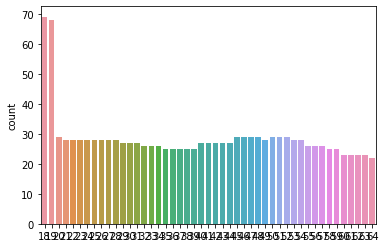

In [3]:
# Opening our .csv file using 'with' keyword
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',') 
    
    list_of_ages = []
    append_row(list_of_ages, 'age', int, read_csv) 
    
    average_age = find_average(list_of_ages)
    print('The average age of a person is', average_age)

ax = sns.countplot(x=list_of_ages)

## Key findings:

The average age of a person that uses medical insurance is 39.20 y.o.. But as the count chart says, we don't have to create a bias that younger people make an insurance less – people with 18 and 19 years old are the most frequent category in our csv! Unfortunately, I hadn't enough context to find out what caused such extraordinary jump in their views.

So, the company that sells insurance has to look after young people more and find out why people between 18 and 19 years old buy insurance so frequently.


The most common region of buying the insurance is: southeast


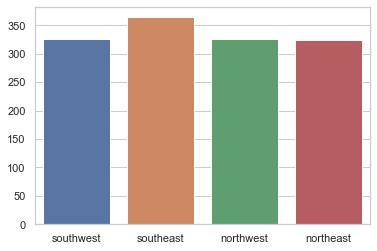

In [2]:
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',') 
    list_of_regions = []
    regions_appearance = []
    for row in read_csv:
        list_of_regions.append(row['region'])
    
    most_common_region = max(list_of_regions, key = list_of_regions.count)
    
# Making a dictionary using a Counter object that has a region as a key and amount of appearances as a value.
    region_frequency_dict = Counter(list_of_regions)
    regions_names = []
    regions_frequencies = []
# Separating keys and values, and appending them to two different lists.
    for key, value in region_frequency_dict.items():
        regions_names.append(key)
        regions_frequencies.append(value)

    print('The most common region of buying the insurance is:', most_common_region)

# Visualazing our findings.
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x = regions_names, y = regions_frequencies)

    

### Key findings:

The most amount of sells is on the Southeast region, but with not a great lead: around 200 sells. 

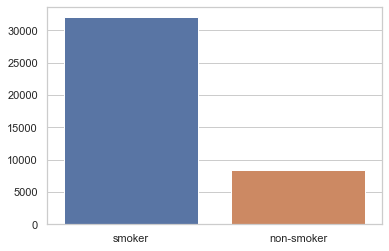

In [3]:
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',') 
    
# Adding costs for smokers and non-smokers
    smoker_costs = []
    non_smoker_costs = []
    for row in read_csv:
        if row['smoker'] == 'yes':
            smoker_costs.append(float(row['charges']))
        else:
            non_smoker_costs.append(float(row['charges']))
    
# Finding averages for both
    average_smoker_cost = find_average(smoker_costs)
    average_non_smoker_cost = find_average(non_smoker_costs)
    
# Defining x and y values for our plot, and visualizing it.
    x_value = ['smoker', 'non-smoker']
    y_value = [average_smoker_cost, average_non_smoker_cost]
    ax = sns.barplot(x = x_value, y = y_value)
        


### Key findings:

Smokers pay for the insurance pay in 5 times more than non-smokers!

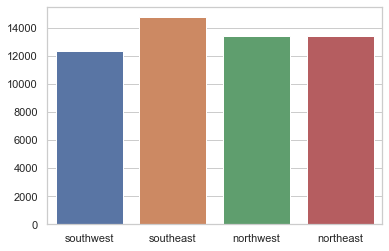

In [4]:
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',') 
    
# Finding average charge for each region. Looks scary, I know. Sorry :)
    charges = []
    append_row(charges, 'charges', float, read_csv)
    southwest_charges = []
    southeast_charges = []
    northwest_charges = []
    northeast_charges = []
    charges_by_regions = list(zip(list_of_regions, charges))

    for element in charges_by_regions:
        if 'southwest' in element:
            southwest_charges.append(element[1])
        elif 'southeast' in element:
            southeast_charges.append(element[1])
        elif 'northeast' in element:
            northeast_charges.append(element[1])
        else:
            northwest_charges.append(element[1])
            
    southwest_avg = find_average(southwest_charges)
    southeast_avg = find_average(southeast_charges)
    northeast_avg = find_average(northeast_charges)
    northwest_avg = find_average(northeast_charges)
    
    regions_average_charges = [southwest_avg, southeast_avg, northwest_avg, northeast_avg]    
    sns.barplot(x=regions_names, y=regions_average_charges)

### Key findings:

Southwest region paying least charges for their insurance. The Southeast paying the most. Maybe it's happenning, because there are less smokers in Southwest, and the most in the Southeast. Let's check!


In [16]:
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',') 
    southwest_smokers = []
    append_row_if(southwest_smokers, 'region', 'southwest', 'smoker', str, read_csv)
    southwest_smokers_percentage = find_percentage(southwest_smokers)  

In [19]:
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',')
    southeast_smokers = []
    append_row_if(southeast_smokers, 'region', 'southeast', 'smoker', str, read_csv)    
    southeast_smokers_percentage = find_percentage(southeast_smokers)

In [21]:
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',')
    northwest_smokers = []
    append_row_if(northwest_smokers, 'region', 'northwest', 'smoker', str, read_csv)
    northwest_smokers_percentage = find_percentage(northwest_smokers)


In [17]:
with open('insurance.csv') as insurance_csv:
    read_csv = csv.DictReader(insurance_csv, delimiter = ',')
    northeast_smokers = []
    append_row_if(northeast_smokers, 'region', 'northeast', 'smoker', str, read_csv)
    northeast_smokers_percentage = find_percentage(northeast_smokers)

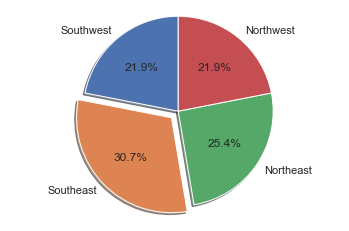

In [32]:
labels = 'Southwest', 'Southeast', 'Northeast', 'Northwest'
sizes = [southwest_smokers_percentage, southeast_smokers_percentage, northeast_smokers_percentage, northwest_smokers_percentage]
explode = (0, 0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()


### Key findings:

As you can see, we have less smokers on the Southwest, and the most on the Southeast. Here is the descending order of smokers percentage:

1. Southeast
2. Northeast
3. Southwest and Northwest (they have equal amount of smokers)


## Summary:
- The average age of a person that uses medical insurance is 39.20 y.o.. But as the count chart says, we don't have to create a bias that younger people make an insurance less – people with 18 and 19 years old are the most frequent category in our csv.
- The most common region of buying the insurance is the Southeast – more than 350 instances of selling insurance. But the region doesn't have a great lead: around 200 sells in comparison to other regions
- In general, smokers pay for the insurance 5 times more than non-smokers.
- We have less smokers on the Southwest – 22%, and most on the Southeast – around 31%.